In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [137]:
df=pd.read_csv("mail_data.csv")
ndata=df.where((pd.notnull(df)),'')
ndata.loc[data["Category"]=="spam","Category",]=0
ndata.loc[data["Category"]=="ham","Category",]=1
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.3,random_state=2)

feature_extraction=TfidfVectorizer(min_df=1,stop_words="english", lowercase=True)
X_train_features= feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

Y_train=Y_train.astype("int")
Y_test=Y_test.astype("int")

Models = LogisticRegression(class_weight='balanced')
Models.fit(X_train_features,Y_train)

prediction_on_data=Models.predict(X_train_features)
accuracy_on_training=accuracy_score(Y_train,prediction_on_data)

prediction_on_test=Models.predict(X_test_features)
accuracy_on_test=accuracy_score(Y_test,prediction_on_test)

In [138]:
print("Accuracy Score on test:",accuracy_on_test)
print("Accuracy Score on training:",accuracy_on_training)

Accuracy Score on test: 0.9746218918226096
Accuracy Score on training: 0.9934171154997008


In [153]:
input_your_mail=["Congratulations! Your account has been selected to receive $7500, verify your bank details immediately to release the payment."]
input_data_features=feature_extraction.transform(input_your_mail)
prediction=Models.predict(input_data_features)
if prediction[0]==1:
    print("The Mail is Not Spam")
else:
    print("The Mail is Spam")


The Mail is Spam


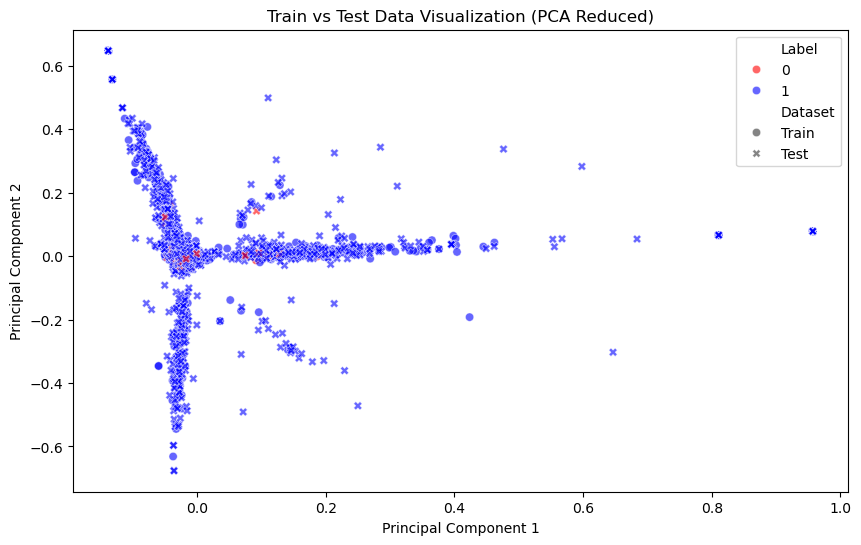

In [150]:
# ------------------------------
# 1️⃣ Import Libraries
# ------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ------------------------------
# 2️⃣ Convert Sparse TF-IDF to Dense (Assuming X_train_features, X_test_features exist)
# ------------------------------
X_train_dense = X_train_features.toarray()
X_test_dense = X_test_features.toarray()

# ------------------------------
# 3️⃣ Apply PCA to Reduce to 2D
# ------------------------------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

# ------------------------------
# 4️⃣ Create DataFrames for Scatter Plot
# ------------------------------
train_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
train_df['Label'] = Y_train.values
train_df['Dataset'] = 'Train'

test_df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
test_df['Label'] = Y_test.values
test_df['Dataset'] = 'Test'

final_df = pd.concat([train_df, test_df])

# ------------------------------
# 5️⃣ Scatter Plot Using Seaborn
# ------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Label',
    style='Dataset',
    data=final_df,
    palette={0:'red', 1:'blue'},
    alpha=0.6
)
plt.title("Train vs Test Data Visualization (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
